---

<center>

# **12 Steps to Navier-Stokes**

<center>

---


## Step 5: 2D Linear Convection

---

Up to now, all of our work has been in one spatial dimension (Steps [1](./Step_1.ipynb) to [4](./Step_4.ipynb)). We can learn a lot in just 1D, but let's grow up to flatland: **two dimensions**. 

First of all we have to extend our **FDM to partial derivatives in 2D**, for that purpose just apply the definition, a partial derivative with respect to $x$ is the variation in the $x$ direction at constant $y$.

In 2D space the grid is defined by points with coordinates


$$x_i = x_0 +i \Delta x$$

$$y_i = y_0 +i \Delta y$$

Now, define $u_{i,j} = u(x_i,y_j)$ and apply the finite-difference formulas on either variable $x,y$ acting separately on the $i$ and $j$ indices. All derivatives are based on the 2D Taylor expansion of a mesh point value around $u_{i,j}$.

Hence, for a first-order partial derivative in the $x$-direction, a finite-difference formula is:

$$ \frac{\partial u}{\partial x}\biggr\rvert_{i,j} = \frac{u_{i+1,j}-u_{i,j}}{\Delta x}+\mathcal{O}(\Delta x)$$

and similarly in the $y$ direction. Thus, we can write backward-difference, forward-difference or central-difference formulas for all remaining steps of this course.

The PDE governing **2D Linear Convection** is written as

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

This is the exact same form as with 1D Linear Convection, except that we now have two spatial dimensions to account for as we step forward in time.  

Again, the timestep will be discretized as a forward difference and both spatial steps will be discretized as backward differences.  

With 1D implementations, we used $i$ subscripts to denote movement in space (e.g. $u_{i}^n-u_{i-1}^n$).  Now that we have two dimensions to account for, we need to add a second subscript, $j$, to account for all the information in two dimensional space.  

Here, we'll again **use $i$ as the index for our $x$ values, and we'll add the $j$ subscript to track our $y$ values**. 

With that in mind, our discretization of the PDE should be relatively straightforward.  

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

As before, solve for the only unknown:

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

We will solve this equation with the following initial conditions:

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1.5 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

and boundary conditions:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

Now, lets graph the wave for $t=0$

In [129]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from matplotlib.ticker import FormatStrFormatter

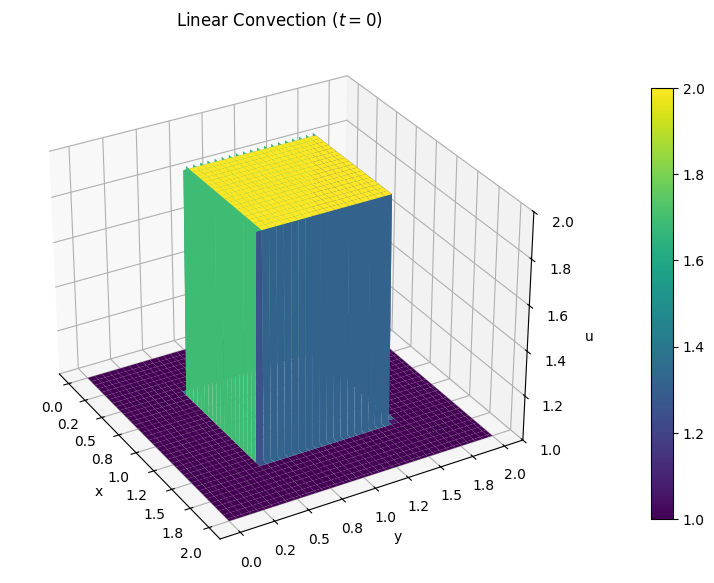

In [148]:
x_points = 151                                 # Number of x grid points
y_points = 151                                 # Number of y grid points
grid_length = 2                                # Lenght of the grid
dx = grid_length / (x_points - 1)              # Distance between adjacent x grid points
dy = grid_length / (x_points - 1)              # Distance between adjacent y grid points
time_steps = 101                               # Number of time steps
c = 1                                          # Assume constant wave speed
sigma = 0.25                                   # CFL number
dt = sigma * dx                                # Size of time steps

# Define 2D space grid

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

# Define wave arrays

u = np.ones((y_points, x_points))
u_n = u.copy()

# Define IC's

u[int(0.5/dy):int((1.5/dy) + 1), int(0.5/dx):int((1.5/dx) + 1)] = 2

# 3D Plot

fig, axis = plt.subplots(subplot_kw={"projection":"3d"}, dpi=100, figsize= (11,7))
ax = axis.plot_surface(X, Y, u[:], cmap='viridis', linewidth=0)
axis.set_title(r'Linear Convection ($t=0$)')
axis.set_zlim(1, 2)
axis.set_ylabel('y')
axis.set_xlabel('x')
axis.set_zlabel('u')
axis.view_init(elev=30, azim=-30)
axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.colorbar(ax, pad=0.12, shrink=0.8)
plt.show()

Now, the iteration process.

To evaluate the wave behaviour in two dimensions requires the use of several nested loops to go through all `i`'s and `j`'s. Because of the increased complexity in computation, Python can show noticeable slowdowns in the execution of the code.

First we'll do the iteration process as we have done so far and then use an **array's operation approach** (vectorization) to see how much faster the computing process is in the latter

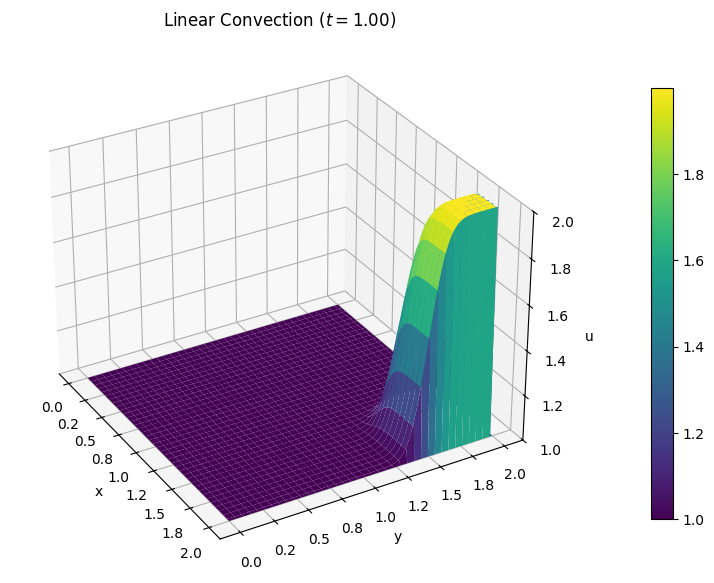

In [ ]:
x_points = 151                                 # Number of x grid points
y_points = 151                                 # Number of y grid points
grid_length = 2                                # Lenght of the grid
dx = grid_length / (x_points - 1)              # Distance between adjacent x grid points
dy = grid_length / (x_points - 1)              # Distance between adjacent y grid points
time_steps = 301                               # Number of time steps
c = 1                                          # Assume constant wave speed
sigma = 0.25                                   # CFL number
dt = sigma * dx                                # Size of time steps

# Define 2D space grid

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

u = np.ones((y_points, x_points))
u[int(0.5/dy):int((1.5/dy) + 1), int(0.5/dx):int((1.5/dx) + 1)] = 2

for n in range(time_steps):
    u_n = u.copy()
    row, col = u.shape
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = u_n[j, i] - (c * (dt/dx) * (u_n[j, i] - u_n[j, i-1])) - (c * (dt/dx) * (u_n[j, i] - u_n[j-1, i]))
            u[0, : ] = 1
            u[-1, : ] = 1
            u[ : , 0] = 1
            u[ : , -1] = 1

fig, axis = plt.subplots(subplot_kw={"projection":"3d"}, dpi=100, figsize= (11,7))
ax = axis.plot_surface(X, Y, u[:], cmap='viridis', linewidth=0)
axis.set_title(rf'Linear Convection ($t={(time_steps)*dt:.2f}$)')
axis.set_zlim(1, 2)
axis.set_ylabel('y')
axis.set_xlabel('x')
axis.set_zlabel('u')
axis.view_init(elev=30, azim=-30)
axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.colorbar(ax, pad=0.12, shrink=0.8)
plt.show()

First we can see that the wave **clearly** travelled and convected a little, but instead of go through with the animation we'll focus on reducing the computing time using a vectorized approach, centered on using array slicing.

With the `for` loop used before we updated each point at a time, with this new approach the entire 2D array will be updated at once, drastically reducing the compute time

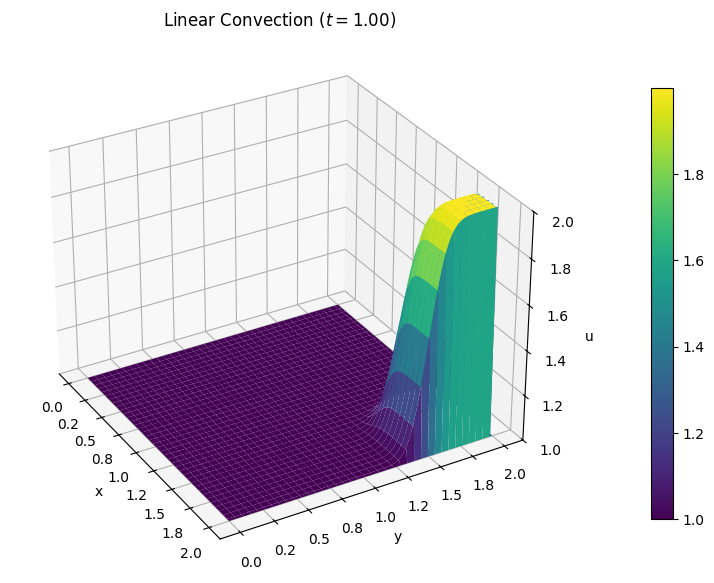

In [156]:
x_points = 151                                 # Number of x grid points
y_points = 151                                 # Number of y grid points
grid_length = 2                                # Lenght of the grid
dx = grid_length / (x_points - 1)              # Distance between adjacent x grid points
dy = grid_length / (x_points - 1)              # Distance between adjacent y grid points
time_steps = 301                               # Number of time steps
c = 1                                          # Assume constant wave speed
sigma = 0.25                                   # CFL number
dt = sigma * dx                                # Size of time steps

# Define 2D space grid

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

u = np.ones((y_points, x_points))
u[int(0.5/dy):int((1.5/dy) + 1), int(0.5/dx):int((1.5/dx) + 1)] = 2

for n in range(time_steps):
    u_n = u.copy()
    u[1:, 1:] = u_n[1:, 1:] - (c * (dt/dx) * (u_n[1:, 1:] - u_n[1:, :-1])) - (c * (dt/dy) * (u_n[1:, 1:] - u_n[:-1, 1:]))
    u[0, : ] = 1
    u[-1, : ] = 1
    u[ : , 0] = 1
    u[ : , -1] = 1    

fig, axis = plt.subplots(subplot_kw={"projection":"3d"}, dpi=100, figsize= (11,7))
ax = axis.plot_surface(X, Y, u[:], cmap='viridis', linewidth=0)
axis.set_title(rf'Linear Convection ($t={(time_steps)*dt:.2f}$)')
axis.set_zlim(1, 2)
axis.set_ylabel('y')
axis.set_xlabel('x')
axis.set_zlabel('u')
axis.view_init(elev=30, azim=-30)
axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.colorbar(ax, pad=0.12, shrink=0.8)
plt.show()

The compute time is 49 seconds for the unvectorized code and just 1 second for the vectorized code, that's $4800\%$ faster.

Now, the animation

In [161]:
x_points = 101                                 # Number of x grid points
y_points = 101                                 # Number of y grid points
grid_length = 2                                # Lenght of the grid
dx = grid_length / (x_points - 1)              # Distance between adjacent x grid points
dy = grid_length / (x_points - 1)              # Distance between adjacent y grid points
time_steps = 301                               # Number of time steps
c = 1                                          # Assume constant wave speed
sigma = 0.25                                   # CFL number
dt = sigma * dx                                # Size of time steps

# Define 2D space grid

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

u = np.ones((y_points, x_points))
u[int(0.5/dy):int((1.5/dy) + 1), int(0.5/dx):int((1.5/dx) + 1)] = 2

plt.ioff()

plt.ioff()
fig, axis = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100, figsize=(11, 7))
axis.set_title(rf'2D Linear Convection (from $t=0$ to $t={(time_steps)*dt:.2f}$)')
axis.set_zlim(1, 2)
axis.set_ylabel('y')
axis.set_xlabel('x')
axis.set_zlabel('u')
axis.view_init(elev=30, azim=-30)
axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

wave = axis.plot_surface(X, Y, u, cmap='viridis', linewidth=0)
plt.colorbar(wave, ax=axis, pad=0.12, shrink=0.8)


def init():
    axis.clear()
    axis.set_title(rf'2D Linear Convection (from $t=0$ to $t={(time_steps)*dt:.2f}$)')
    axis.set_zlim(1, 2)
    axis.set_ylabel('y')
    axis.set_xlabel('x')
    axis.set_zlabel('u')
    axis.view_init(elev=30, azim=-30)
    axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    wave = axis.plot_surface(X, Y, u, cmap='viridis', linewidth=0)
    return wave,

def update_anim(frame):
    u_n = u.copy()
    u[1:, 1:] = u_n[1:, 1:] - (c * (dt/dx) * (u_n[1:, 1:] - u_n[1:, :-1])) - (c * (dt/dy) * (u_n[1:, 1:] - u_n[:-1, 1:]))
    u[0, : ] = 1
    u[-1, : ] = 1
    u[ : , 0] = 1
    u[ : , -1] = 1

    axis.clear()
    axis.set_title(rf'2D Linear Convection (from $t=0$ to $t={(time_steps)*dt:.2f}$)')
    axis.set_zlim(1, 2)
    axis.set_ylabel('y')
    axis.set_xlabel('x')
    axis.set_zlabel('u')
    axis.view_init(elev=30, azim=-30)
    axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    wave = axis.plot_surface(X, Y, u, cmap='viridis', linewidth=0)
    return wave,


anim = animation.FuncAnimation(
                fig = fig,
                func = update_anim,
                init_func = init,
                frames = time_steps,
                interval = 50
)

anim.save('2D_linear_convection.mp4', writer=animation.FFMpegWriter(fps=30))

plt.ion()